# Decision Trees and Classification Evaluation

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv('data/Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
import seaborn as sns

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='Weight'>

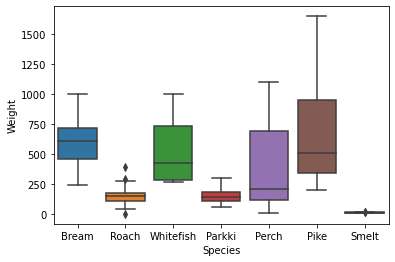

In [5]:
sns.boxplot('Species', 'Weight', data = fish)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
X = fish.iloc[:, 2:]
y = fish.Weight

In [13]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y), random_state = 22)

In [62]:
lr = LinearRegression()
dtree = DecisionTreeRegressor()

In [63]:
from sklearn.pipeline import make_pipeline

In [64]:
knn = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [65]:
def model_scorer(model):
    model.fit(X_train, y_train)
    return f'The percent of variation around the mean of y explained by X is {model.score(X_test, y_test)*100:.4f}'

In [66]:
model_scorer(lr)

'The percent of variation around the mean of y explained by X is 93.1315'

In [67]:
model_scorer(dtree)

'The percent of variation around the mean of y explained by X is 97.0725'

In [72]:
model_scorer(knn)

'The percent of variation around the mean of y explained by X is 95.2277'

In [73]:
lr_preds = lr.predict(X_test)
dtree_preds = dtree.predict(X_test)
knn_preds = knn.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [85]:
mean_squared_error(y_test, np.expm1(lr_preds), squared = False)

730.3985389320857

In [86]:
mean_squared_error(y_test, np.expm1(dtree_preds), squared = False)

632.0287892134381

In [87]:
mean_squared_error(y_test, np.expm1(knn_preds), squared = False)

534.7552033182036

In [88]:
import matplotlib.pyplot as plt
import numpy as np

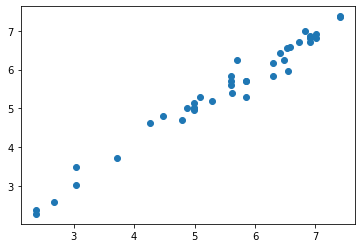

In [89]:
plt.scatter(dtree_preds, y_test)

### Coefficients

In a linear model, we *can* consider the coefficients as saying something.  **WE MUST HAVE FEATURES ON THE SAME SCALE IF WE WANT TO COMPARE RELATIVE FEATURE IMPORTANCE!!!!**

In [93]:
pd.DataFrame({'coefs': abs(lr.coef_), 'features': X.columns}).sort_values(by = 'coefs', ascending = False)

,coefs,features
1,0.493987,Length2
0,0.402496,Length1
4,0.246816,Width
3,0.091831,Height
2,0.059912,Length3


In [96]:
pd.DataFrame({'importances': dtree.feature_importances_, 'features': X.columns}).sort_values(by = 'importances', ascending = False)

,importances,features
1,0.611799,Length2
2,0.270582,Length3
4,0.107154,Width
3,0.007238,Height
0,0.003227,Length1


### Classification

In [97]:
health = pd.read_csv('data/fetal_health.csv')

In [98]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [99]:
health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [100]:
X = health.drop('fetal_health', axis = 1)
y = health.fetal_health

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [104]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
lgr = make_pipeline(StandardScaler(), LogisticRegression())
dtree = DecisionTreeClassifier()

In [105]:
for model in knn, lgr, dtree:
    model.fit(X_train, y_train)

In [107]:
for model in knn, lgr, dtree:
    print(model.__str__(), model.score(X_test, y_test))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]) 0.8834586466165414
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]) 0.8890977443609023
DecisionTreeClassifier() 0.9022556390977443


In [111]:
print(f'The KNN model got {knn.score(X_test, y_test)*100: .3f} percent correct')

The KNN model got  88.346 percent correct


In [109]:
lgr.score(X_test, y_test)

0.8890977443609023

In [110]:
dtree.score(X_test, y_test)

0.9022556390977443

In [112]:
from sklearn.metrics import plot_confusion_matrix

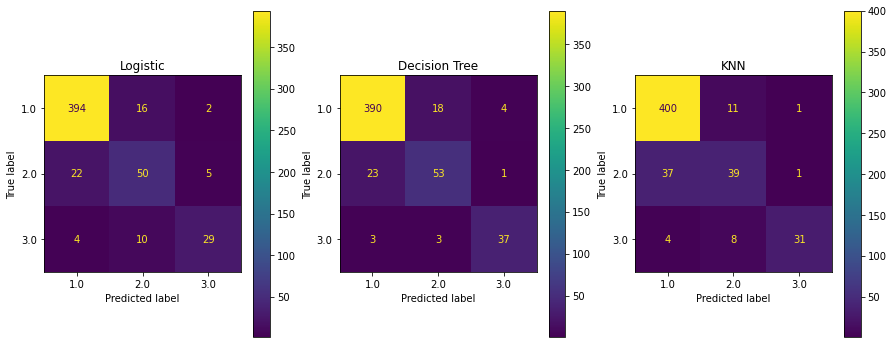

In [116]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

plot_confusion_matrix(lgr, X_test, y_test, ax = ax[0])
ax[0].set_title('Logistic')

plot_confusion_matrix(dtree, X_test, y_test, ax = ax[1])
ax[1].set_title('Decision Tree')

plot_confusion_matrix(knn, X_test, y_test, ax = ax[2])
ax[2].set_title('KNN');

In [118]:
from sklearn.ensemble import VotingClassifier

In [121]:
democratic_classifier = VotingClassifier([('lgr', lgr), ('knn', knn), ('dtree', dtree)])

In [122]:
democratic_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lgr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier())])),
                             ('dtree', DecisionTreeClassifier())])

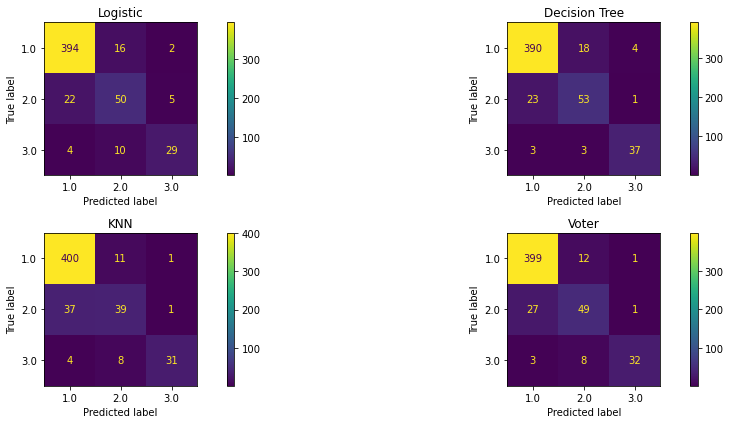

In [125]:
fig, ax = plt.subplots(2,2, figsize = (15, 6))

plot_confusion_matrix(lgr, X_test, y_test, ax = ax[0, 0])
ax[0, 0].set_title('Logistic')

plot_confusion_matrix(dtree, X_test, y_test, ax = ax[0, 1])
ax[0, 1].set_title('Decision Tree')

plot_confusion_matrix(knn, X_test, y_test, ax = ax[1, 0])
ax[1, 0].set_title('KNN');

plot_confusion_matrix(democratic_classifier, X_test, y_test, ax = ax[1, 1])
ax[1, 1].set_title('Voter');
plt.tight_layout()

In [126]:
from sklearn.metrics import plot_roc_curve

In [129]:
from scikitplot.metrics import plot_roc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

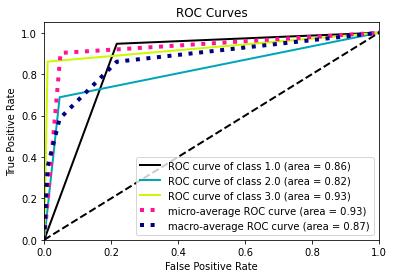

In [134]:
plot_roc(y_test, dtree.predict_proba(X_test))

AttributeError: predict_proba is not available when voting='hard'

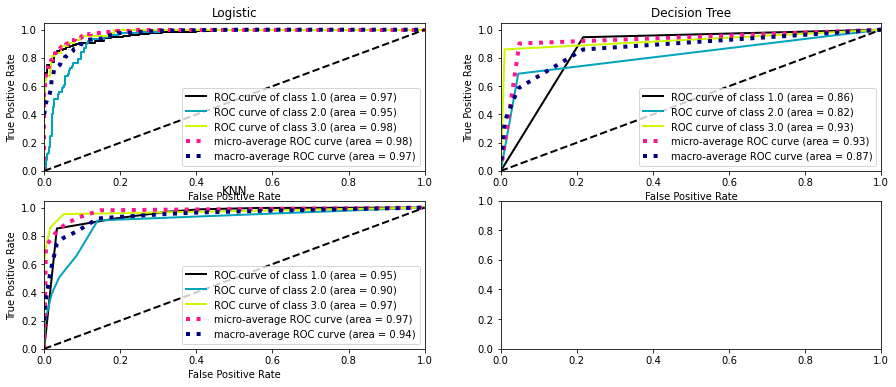

In [135]:
fig, ax = plt.subplots(2,2, figsize = (15, 6))

plot_roc(y_test, lgr.predict_proba(X_test), ax = ax[0, 0])
ax[0, 0].set_title('Logistic')

plot_roc(y_test, dtree.predict_proba(X_test), ax = ax[0, 1])
ax[0, 1].set_title('Decision Tree')

plot_roc(y_test, knn.predict_proba(X_test), ax = ax[1, 0])
ax[1, 0].set_title('KNN');

plot_roc(y_test, democratic_classifier.predict_proba(X_test), ax = ax[1, 1])
ax[1, 1].set_title('Voter');
plt.tight_layout()